In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('index.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = pd.to_datetime(data['date'])
data['Hour'] = data['datetime'].dt.hour
data['Weekdays'] = data['datetime'].dt.day_name()
data['Month'] = data['datetime'].dt.month_name()
data['year'] = data['datetime'].dt.year
data['card'] = data['card'].fillna("Cash payment")
print("Data Loaded Successfully!")
data.head()

Data Loaded Successfully!


,date,datetime,cash_type,card,money,coffee_name,Hour,Weekdays,Month,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,Friday,March,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,Friday,March,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,Friday,March,2024


In [4]:
data.tail()

,date,datetime,cash_type,card,money,coffee_name,Hour,Weekdays,Month,year
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,Wednesday,July,2024
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,Wednesday,July,2024
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,Wednesday,July,2024
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,21,Wednesday,July,2024
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte,21,Wednesday,July,2024


In [5]:
data.shape

(1133, 10)

In [6]:
print("Number of columns:", data.shape[0])
print("Number of rows:", data.shape[1])

Number of columns: 1133
Number of rows: 10


In [7]:
data.describe()

,date,datetime,money,Hour,year
count,1133,1133,1133.000000,1133.000000,1133.0
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808,14.552515,2024.0
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000,7.000000,2024.0
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000,11.000000,2024.0
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000,14.000000,2024.0
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000,18.000000,2024.0
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000,22.000000,2024.0
std,NaN,NaN,5.035366,4.084588,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   Hour         1133 non-null   int32         
 7   Weekdays     1133 non-null   object        
 8   Month        1133 non-null   object        
 9   year         1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(2), object(5)
memory usage: 79.8+ KB


In [9]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0
Hour,0
Weekdays,0
Month,0
year,0


In [10]:
data.duplicated().sum()

np.int64(0)

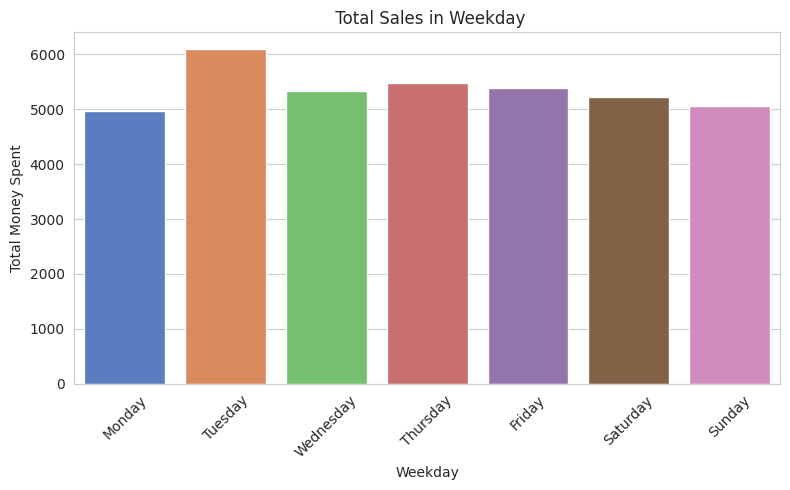

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Weekdays', y='money', data=data, estimator=sum, ci=None, palette='muted',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title(" Total Sales in Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Money Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

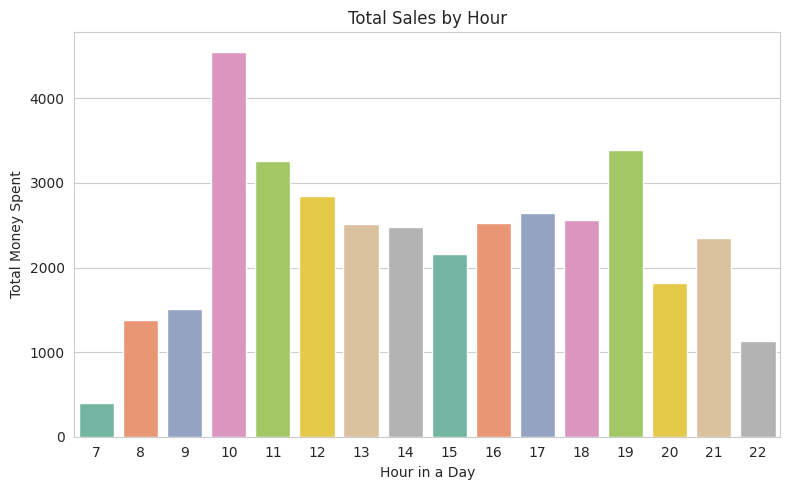

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Hour', y='money', data=data, estimator=sum, ci=None, palette='Set2')
plt.title("Total Sales by Hour")
plt.xlabel("Hour in a Day")
plt.ylabel("Total Money Spent")
plt.tight_layout()
plt.show()

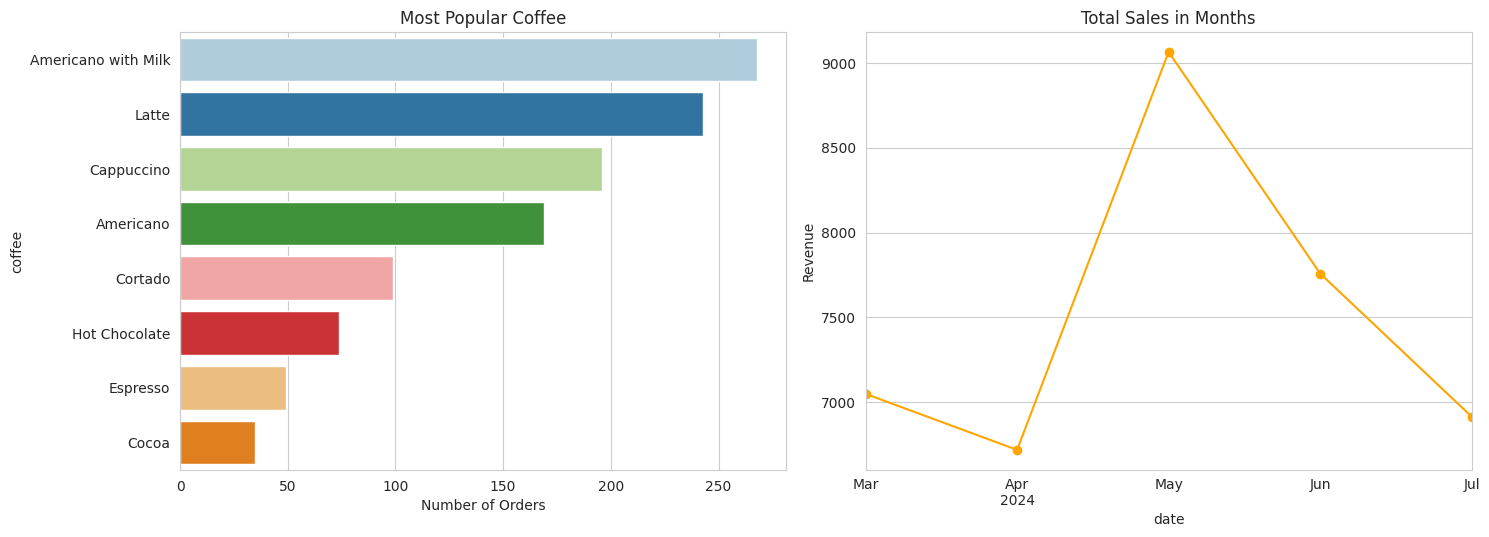

In [13]:
plt.figure(figsize=(15, 10))
#
plt.subplot(2, 2, 1)
sns.countplot(y='coffee_name', data=data, order=data['coffee_name'].value_counts().index, palette='Paired')
plt.title('Most Popular Coffee')
plt.xlabel('Number of Orders')
plt.ylabel('coffee')
#
plt.subplot(2, 2, 2)
monthly_sales = data.groupby(data['date'].dt.to_period('M'))['money'].sum()
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Total Sales in Months')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


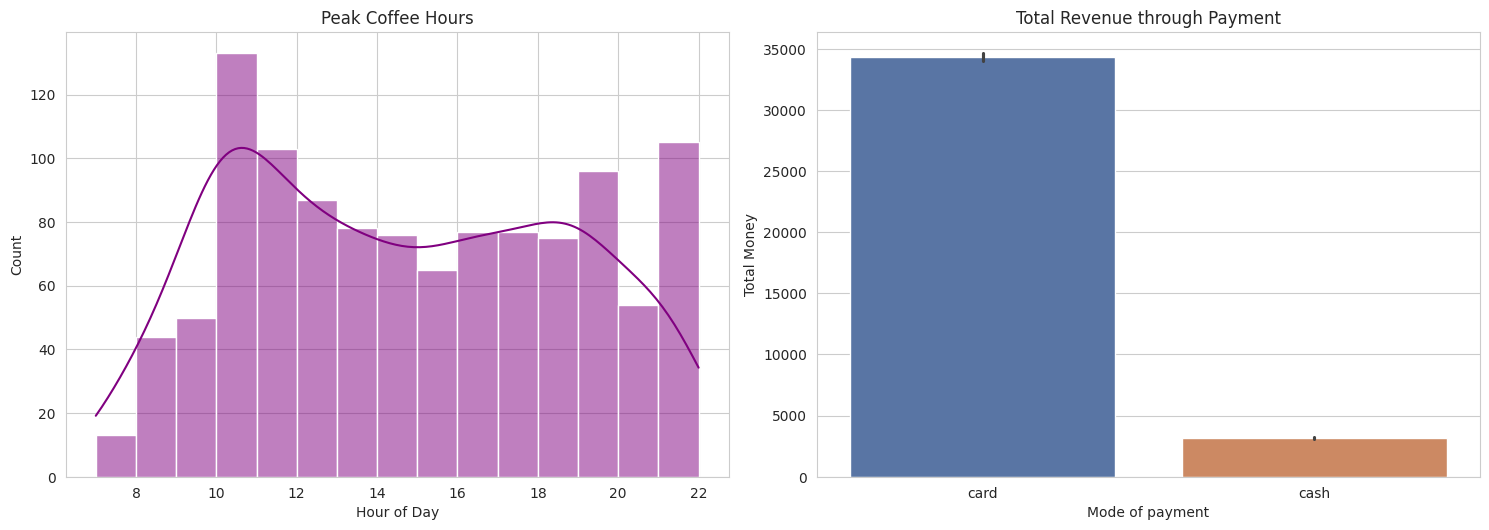

In [14]:
plt.figure(figsize=(15, 10))
#
plt.subplot(2, 2, 1)
sns.histplot(data['Hour'], bins=15, kde=True, color='purple')
plt.title('Peak Coffee Hours')
plt.xlabel('Hour of Day')
#
plt.subplot(2, 2, 2)
sns.barplot(x='cash_type', y='money', data=data, estimator=sum, palette='deep')
plt.title('Total Revenue through Payment')
plt.xlabel('Mode of payment')
plt.ylabel('Total Money')
plt.tight_layout()
plt.show()

In [15]:
day_sales = data.groupby('date')['money'].sum().reset_index()
day_sales['Prev_Day_Sales'] = day_sales['money'].shift(1)
day_sales['Prev_Week_Sales'] = day_sales['money'].shift(7)
day_sales['Day_Index'] = day_sales['date'].dt.dayofweek
day_sales = day_sales.dropna()
print("Prepared Data for ML (First 5 Rows):")
day_sales.head()

Prepared Data for ML (First 5 Rows):


,date,money,Prev_Day_Sales,Prev_Week_Sales,Day_Index
7,2024-03-08,265.5,220.1,396.3,4
8,2024-03-09,479.4,265.5,228.1,5
9,2024-03-10,231.6,479.4,349.1,6
10,2024-03-11,275.2,231.6,135.2,0
11,2024-03-12,228.1,275.2,338.5,1


In [16]:
X = day_sales[['Prev_Day_Sales', 'Prev_Week_Sales', 'Day_Index']]
y = day_sales['money']
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print(f"✅ Model Trained!")
print(f"Prediction Accuracy (R^2 Score): {r2:.2f}")

✅ Model Trained!
Prediction Accuracy (R^2 Score): -0.28


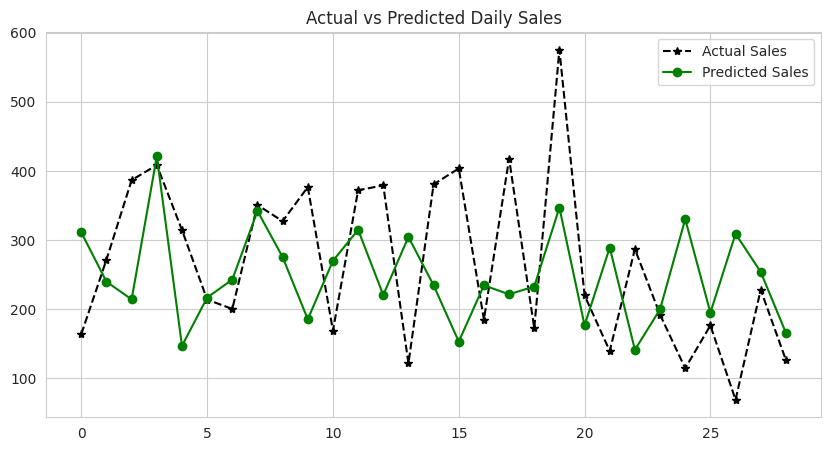

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='black', linestyle='--', marker='*')
plt.plot(predictions, label='Predicted Sales', color='green', marker='o')
plt.title('Actual vs Predicted Daily Sales')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 R² Score: {r2:.4f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")

📈 R² Score: -0.2764
📉 MAE: 108.50
📉 MSE: 18185.48


In [19]:
df_pred = pd.DataFrame({
    'Actual': y_test[:25].values,
    'Predicted': y_pred[:25]
})
df_pred

,Actual,Predicted
0,164.10,310.9946
1,271.70,239.7610
2,386.80,214.1532
3,408.54,421.3562
4,314.58,146.9364
5,213.90,216.7220
6,200.34,242.8636
7,350.82,342.1108
8,327.34,275.4390
9,376.70,185.4108
